## Pest Detection Using AlexNet

In [10]:
#importing Necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
#importing Necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
# Define paths to dataset directories
train_dir = "dataset/pest demo/training"
val_dir = "dataset/pest demo/validation"
test_dir ="dataset/pest demo/testing"


In [12]:
# Define image dimensions
image_size = (224, 224)
num_classes = 13  # Number of categories including "Healthy"

In [13]:
# Define batch size
batch_size = 35

In [14]:
# Create data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7208 images belonging to 13 classes.
Found 701 images belonging to 13 classes.
Found 1733 images belonging to 13 classes.


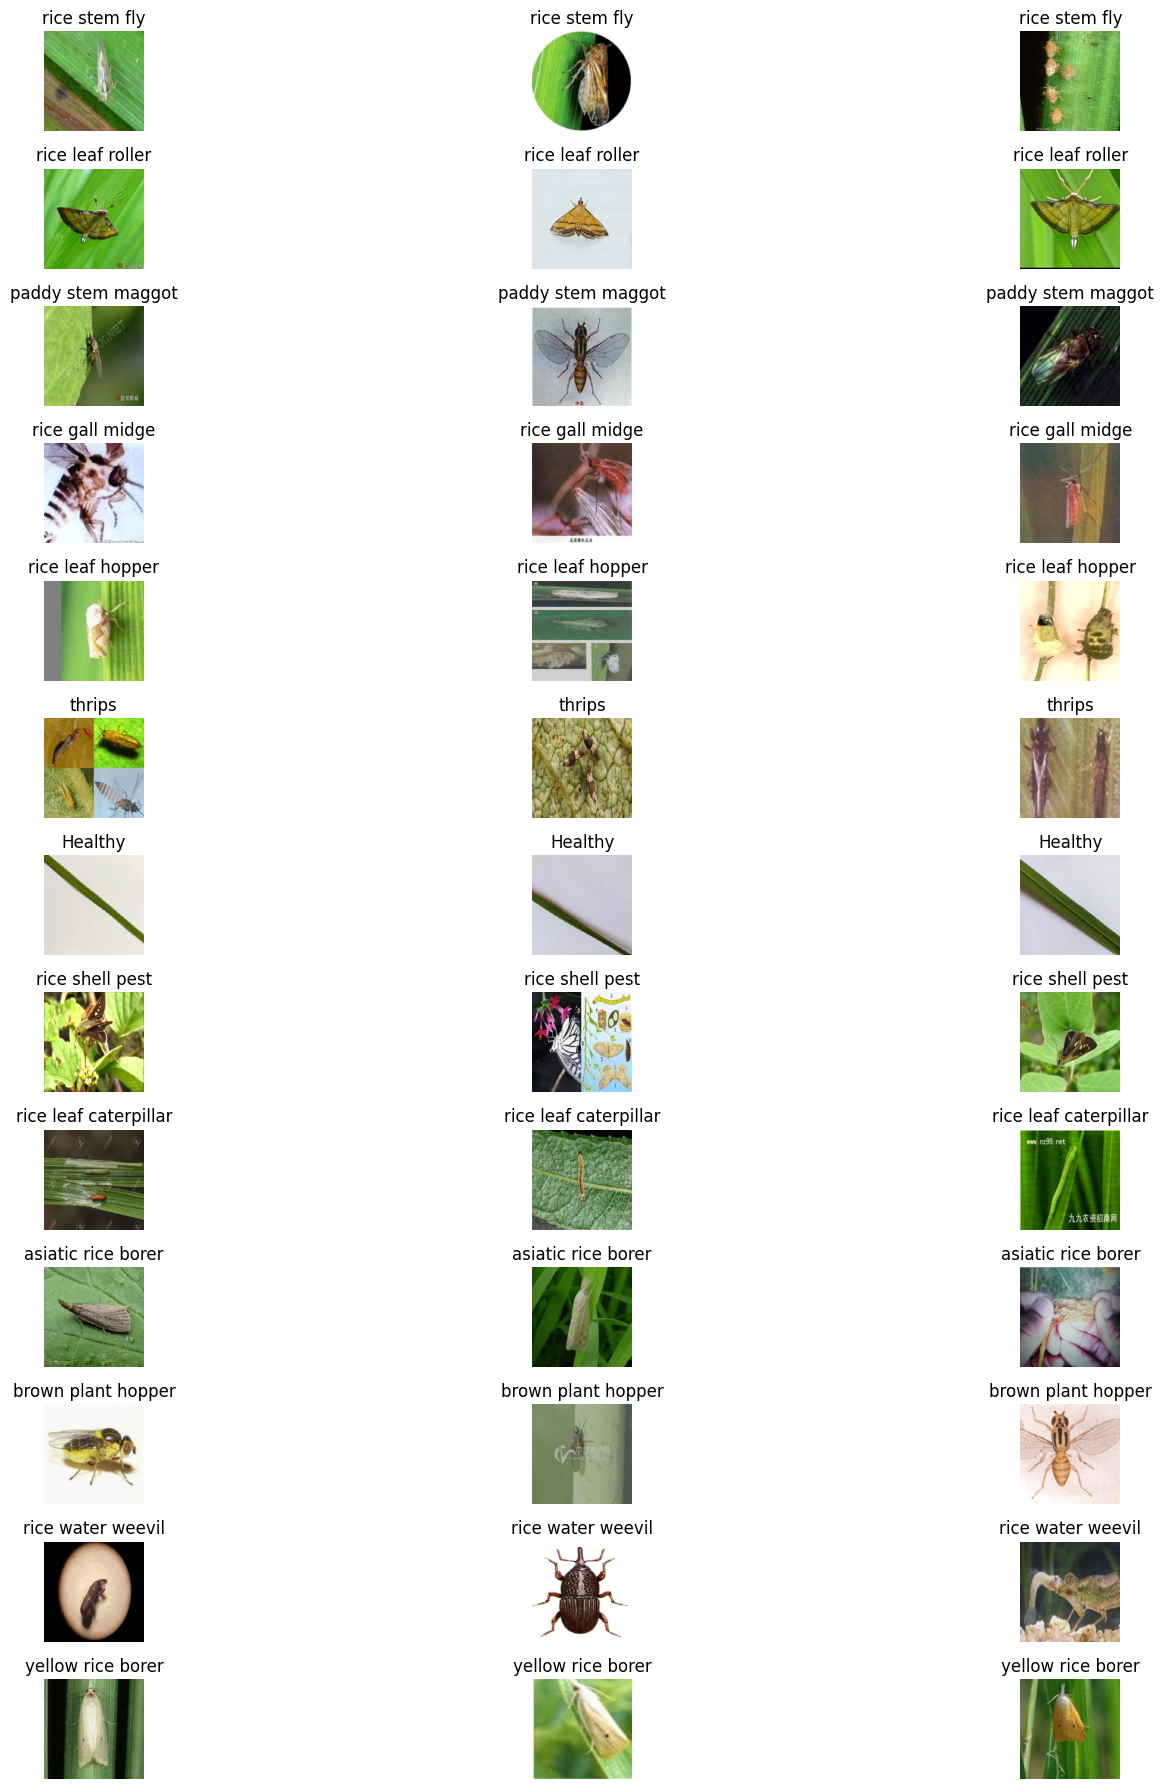

In [15]:
# Function to visualize images from each class in the dataset directory
def visualize_images(dataset_dir, num_images_per_class=3):
    class_names = os.listdir(dataset_dir)
    num_classes = len(class_names)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(18, 18))

    # Loop through each class
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)[:num_images_per_class]

        # Load and display images from the current class
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_dir, image_file)
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            axes[i, j].imshow(img)
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
dataset_dir = "dataset/pest demo/training"
visualize_images(dataset_dir)

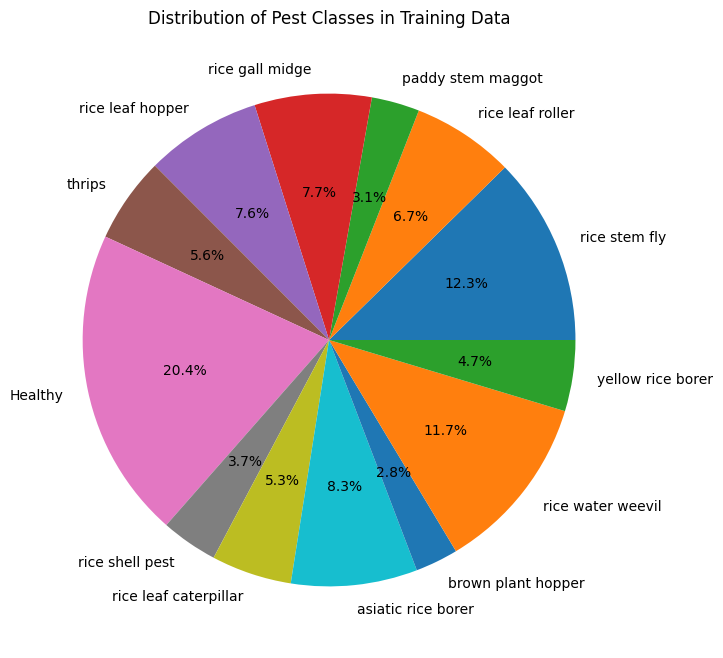

In [16]:
import os
import matplotlib.pyplot as plt

# Define the path to the training directory
train_dir = "dataset/pest demo/training"

# Initialize a dictionary to store the count of images for each disease class
disease_counts = {}

# Iterate through each subdirectory (disease class) in the training directory
for disease_class in os.listdir(train_dir):
    # Count the number of images in the current disease class
    class_path = os.path.join(train_dir, disease_class)
    num_images = len(os.listdir(class_path))
    # Store the count in the dictionary
    disease_counts[disease_class] = num_images

# Plot the counts in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(disease_counts.values(), labels=disease_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Pest Classes in Training Data')
plt.show()


In [17]:
# Function to define AlexNet architecture
def AlexNet(input_shape, num_classes):
    model = Sequential([
        # 1st Convolutional Layer
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        
        # 2nd Convolutional Layer
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        
        # 3rd Convolutional Layer
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        
        # 4th Convolutional Layer
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        
        # 5th Convolutional Layer
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        
        # Passing it to a Fully Connected layer
        Flatten(),
        # 1st Fully Connected Layer
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 2nd Fully Connected Layer
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # 3rd Fully Connected Layer
        Dense(num_classes, activation='softmax')
    ])
    
    return model


In [18]:
# Create AlexNet model
input_shape = (224, 224, 3)
model = AlexNet(input_shape, num_classes)


2024-05-02 09:08:49.897461: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3169 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:3b:00.0, compute capability: 6.0


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
print("--------------------------------------\n")
model.summary()
print("--------------------------------------\n")

--------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2

In [21]:
print("--------------------------------------\n")
print("Training Started.\n")

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
   
)

print("Training Finished.\n")
print("--------------------------------------\n")

--------------------------------------

Training Started.

Epoch 1/50


2024-05-02 09:08:53.286424: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-02 09:08:53.369204: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-02 09:08:54.022251: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-02 09:08:54.750523: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f552c985560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-02 09:08:54.750570: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla P100-PCIE-12GB, Compute Capability 6.0
2024-05-02 09:08:54.757934: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714640934.904715 1729006 device_compiler.h:1

205/205 [==============================] - 70s 315ms/step - loss: 2.4462 - accuracy: 0.2434 - val_loss: 2.1134 - val_accuracy: 0.3029
Epoch 2/50
205/205 [==============================] - 62s 304ms/step - loss: 1.9361 - accuracy: 0.3378 - val_loss: 2.0688 - val_accuracy: 0.2843
Epoch 3/50
205/205 [==============================] - 62s 302ms/step - loss: 1.8328 - accuracy: 0.3675 - val_loss: 1.9228 - val_accuracy: 0.3443
Epoch 4/50
205/205 [==============================] - 64s 312ms/step - loss: 1.7094 - accuracy: 0.4156 - val_loss: 1.7990 - val_accuracy: 0.4071
Epoch 5/50
205/205 [==============================] - 62s 302ms/step - loss: 1.6082 - accuracy: 0.4608 - val_loss: 1.7999 - val_accuracy: 0.3971
Epoch 6/50
205/205 [==============================] - 64s 310ms/step - loss: 1.5197 - accuracy: 0.4849 - val_loss: 1.5410 - val_accuracy: 0.5014
Epoch 7/50
205/205 [==============================] - 64s 310ms/step - loss: 1.4316 - accuracy: 0.5186 - val_loss: 1.4222 - val_accuracy: 0.5

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


49/49 [==============================] - 3s 62ms/step - loss: 1.7122 - accuracy: 0.8700
Test loss: 1.7121869325637817
Test accuracy: 0.8699708580970764


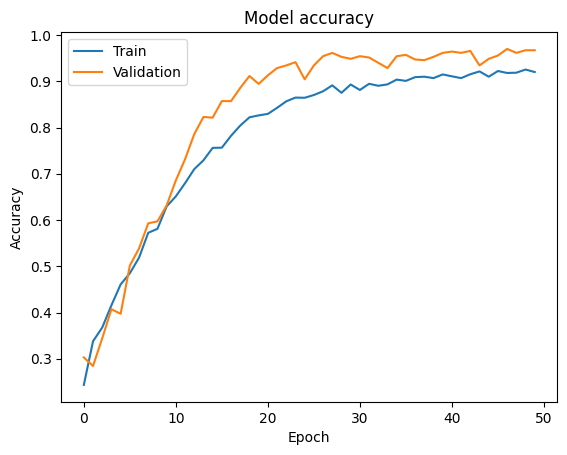

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values   
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('DenseNet_Pest_Acc.png')
plt.show()

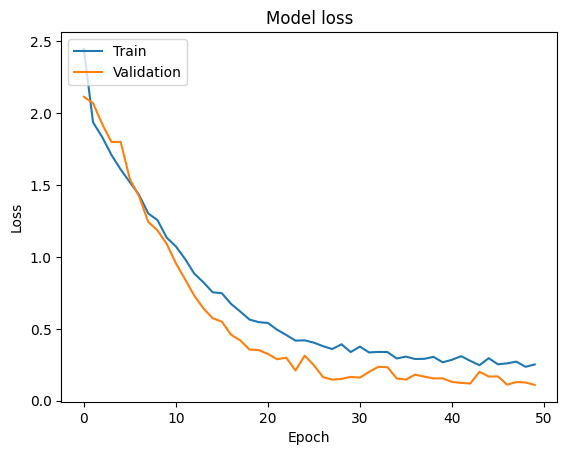

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('DenseNet_Pest_loss.png')
plt.show()

1/1 [==============================] - 0s 395ms/step


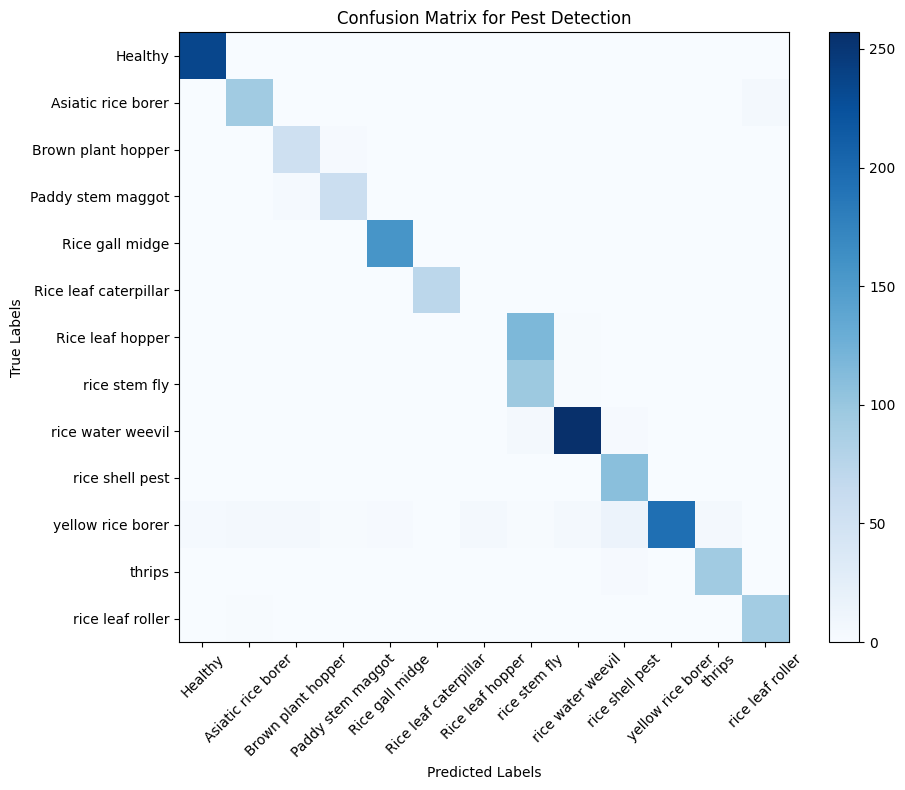

In [25]:
from sklearn.metrics import confusion_matrix
pest_labels =['Healthy', 'Asiatic rice borer', 'Brown plant hopper', 'Paddy stem maggot', 'Rice gall midge', 'Rice leaf caterpillar', 'Rice leaf hopper','rice stem fly','rice water weevil','rice shell pest','yellow rice borer','thrips','rice leaf roller']
# Get true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test generator to get predictions
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix for Pest Detection')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(pest_labels)), pest_labels, rotation=45)
plt.yticks(np.arange(len(pest_labels)), pest_labels)
plt.tight_layout()
plt.show()

In [26]:

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, y_pred_classes, target_names=class_labels))

50/50 [==============================] - 3s 58ms/step
                       precision    recall  f1-score   support

              Healthy       0.97      1.00      0.99       234
   asiatic rice borer       0.90      0.94      0.92       100
   brown plant hopper       0.86      0.93      0.89        58
    paddy stem maggot       0.92      0.88      0.90        65
      rice gall midge       0.97      0.99      0.98       158
rice leaf caterpillar       0.96      0.96      0.96        75
     rice leaf hopper       0.00      0.00      0.00       121
     rice leaf roller       0.43      0.96      0.60       101
      rice shell pest       0.97      0.97      0.97       265
        rice stem fly       0.83      0.99      0.90       110
    rice water weevil       0.98      0.78      0.87       250
               thrips       0.90      0.94      0.92       100
    yellow rice borer       0.94      0.96      0.95        96

             accuracy                           0.87      1733

In [27]:
# Make predictions on new images
def predict_pest(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = tf.argmax(prediction, axis=1)[0]

    pests = ['Healthy', 'Asiatic rice borer', 'Brown plant hopper', 'Paddy stem maggot', 'Rice gall midge', 'Rice leaf caterpillar', 'Rice leaf hopper','rice stem fly','rice water weevil','rice shell pest','yellow rice borer','thrips','rice leaf roller']

    if predicted_class_index == 0:
        return "No pest found: Healthy"
    else:
        return f"Pest found, Type: {pests[predicted_class_index]}"


In [28]:
image_path =  r"dataset/pest demo/training/Healthy/shape 1005 .jpg"
predicted_pest = predict_pest(image_path)
print(f"Pest Prediction: {predicted_pest}")

1/1 [==============================] - 0s 197ms/step
Pest Prediction: No pest found: Healthy


In [29]:
image_path =  r"dataset/pest demo/training/rice leaf hopper/9 (105).jpg"
predicted_pest = predict_pest(image_path)
print(f"Pest Prediction: {predicted_pest}")

1/1 [==============================] - 0s 20ms/step
Pest Prediction: Pest found, Type: Rice leaf hopper


In [30]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}